In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [2]:
bike = pd.read_csv("day.csv")

In [3]:
# Check the head of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#Inspecting the data
bike.shape

(730, 16)

In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 88.5+ KB


In [6]:
#Dropping dteday as month and year column is there
bike = bike.drop(columns=['dteday'])


In [7]:
#Dropping atemp column as it is highly co-related with temp column
bike = bike.drop(columns=['atemp'])


In [8]:
#Converting season to string
bike.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
bike.season.value_counts(normalize=True)


Fall      0.257534
Summer    0.252055
Spring    0.246575
Winter    0.243836
Name: season, dtype: float64

In [9]:
#Converting mnth to string
bike.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
bike.mnth.value_counts(normalize=True)

Dec    0.084932
Jan    0.084932
Aug    0.084932
May    0.084932
Mar    0.084932
Jul    0.084932
Oct    0.084932
Apr    0.082192
Jun    0.082192
Nov    0.082192
Sep    0.082192
Feb    0.076712
Name: mnth, dtype: float64

In [10]:
#Converting weathersit to string
bike.weathersit.replace((1,2,3,4), ('Clear','Misty','LightRainSnow','HeavyRainSnow'), inplace=True)
bike.weathersit.value_counts(normalize=True)

Clear            0.634247
Misty            0.336986
LightRainSnow    0.028767
Name: weathersit, dtype: float64

In [11]:
#Converting weekday
bike.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
bike.weekday.value_counts(normalize=True)

Sunday       0.143836
Saturday     0.143836
Monday       0.143836
Thursday     0.142466
Friday       0.142466
Tuesday      0.142466
Wednesday    0.141096
Name: weekday, dtype: float64

In [12]:
bike.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,Spring,0,Jan,0,Saturday,0,Misty,14.110847,80.5833,10.749882,331,654,985
1,2,Spring,0,Jan,0,Sunday,0,Misty,14.902598,69.6087,16.652113,131,670,801
2,3,Spring,0,Jan,0,Monday,1,Clear,8.050924,43.7273,16.636703,120,1229,1349
3,4,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,108,1454,1562
4,5,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,82,1518,1600


In [13]:
#Dropping registered and casual column as cnt column is sufficient 
bike = bike.drop(columns=['registered','casual'])

In [14]:
bike.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,Spring,0,Jan,0,Saturday,0,Misty,14.110847,80.5833,10.749882,985
1,2,Spring,0,Jan,0,Sunday,0,Misty,14.902598,69.6087,16.652113,801
2,3,Spring,0,Jan,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349
3,4,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562
4,5,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600


In [15]:
#Visualizing the data

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

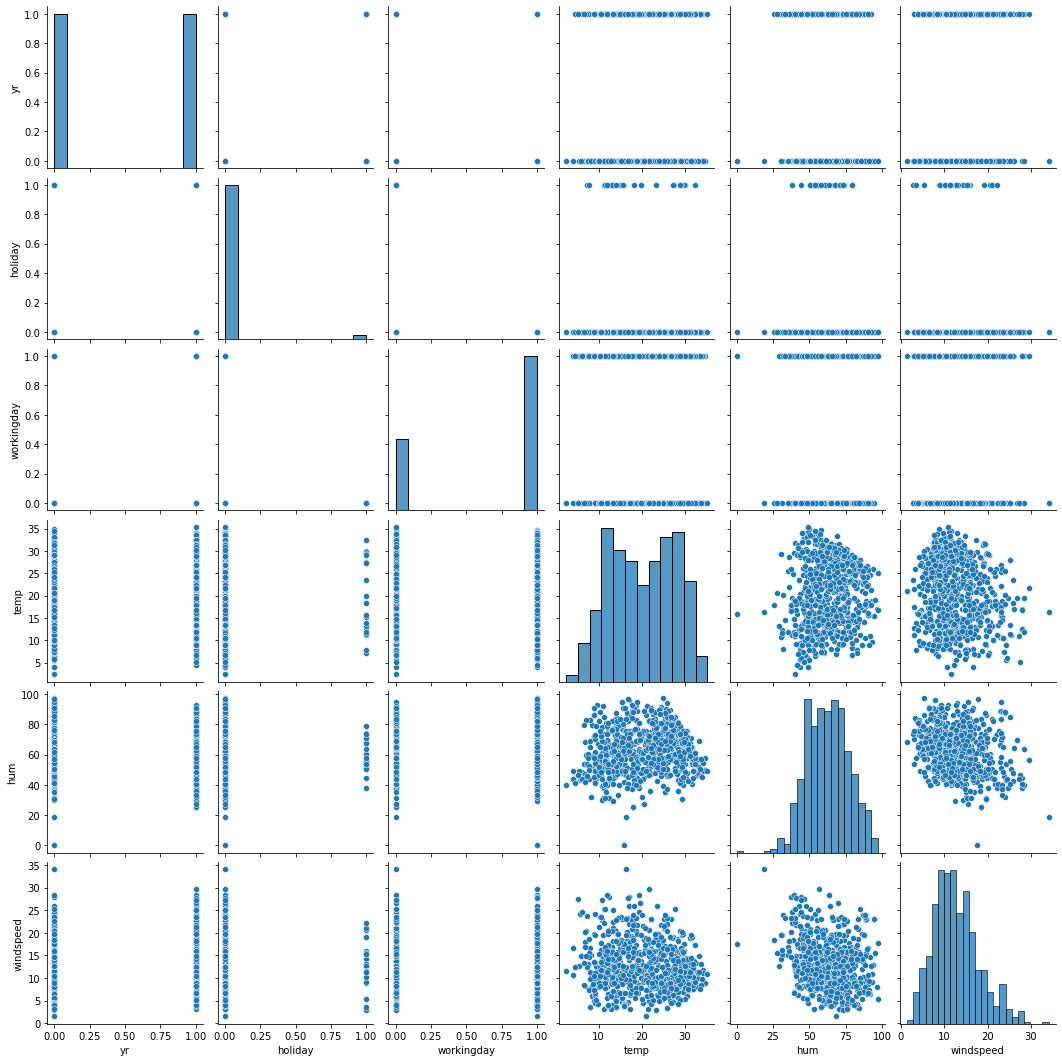

In [17]:
sns.pairplot(bike.iloc[:, 1:11])
plt.show()

In [18]:
#Visualizing the categorical data

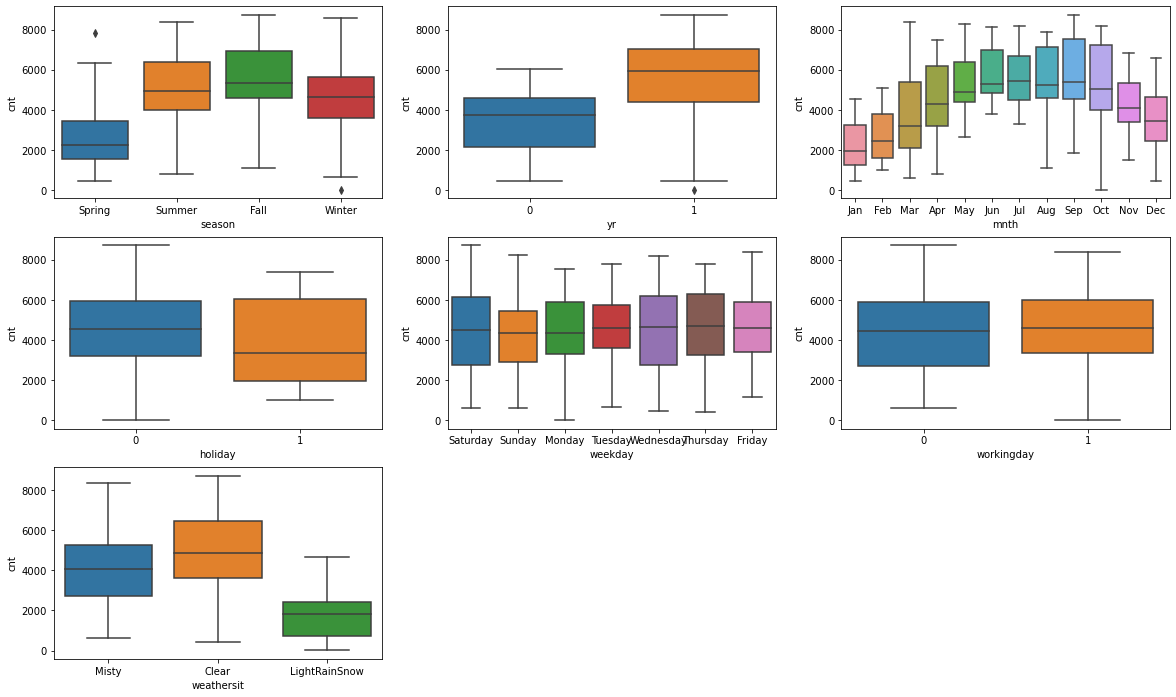

In [19]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)

plt.show()

# As we see from above charts, bike ride count is high during Summer and Fall season during month of May,Jun, July, Aug, Sep,Oct. Demand for bike is same on all weekdays during favourable season and goes high on Clear and misty weather. During rain and snow,bike riders count decreases

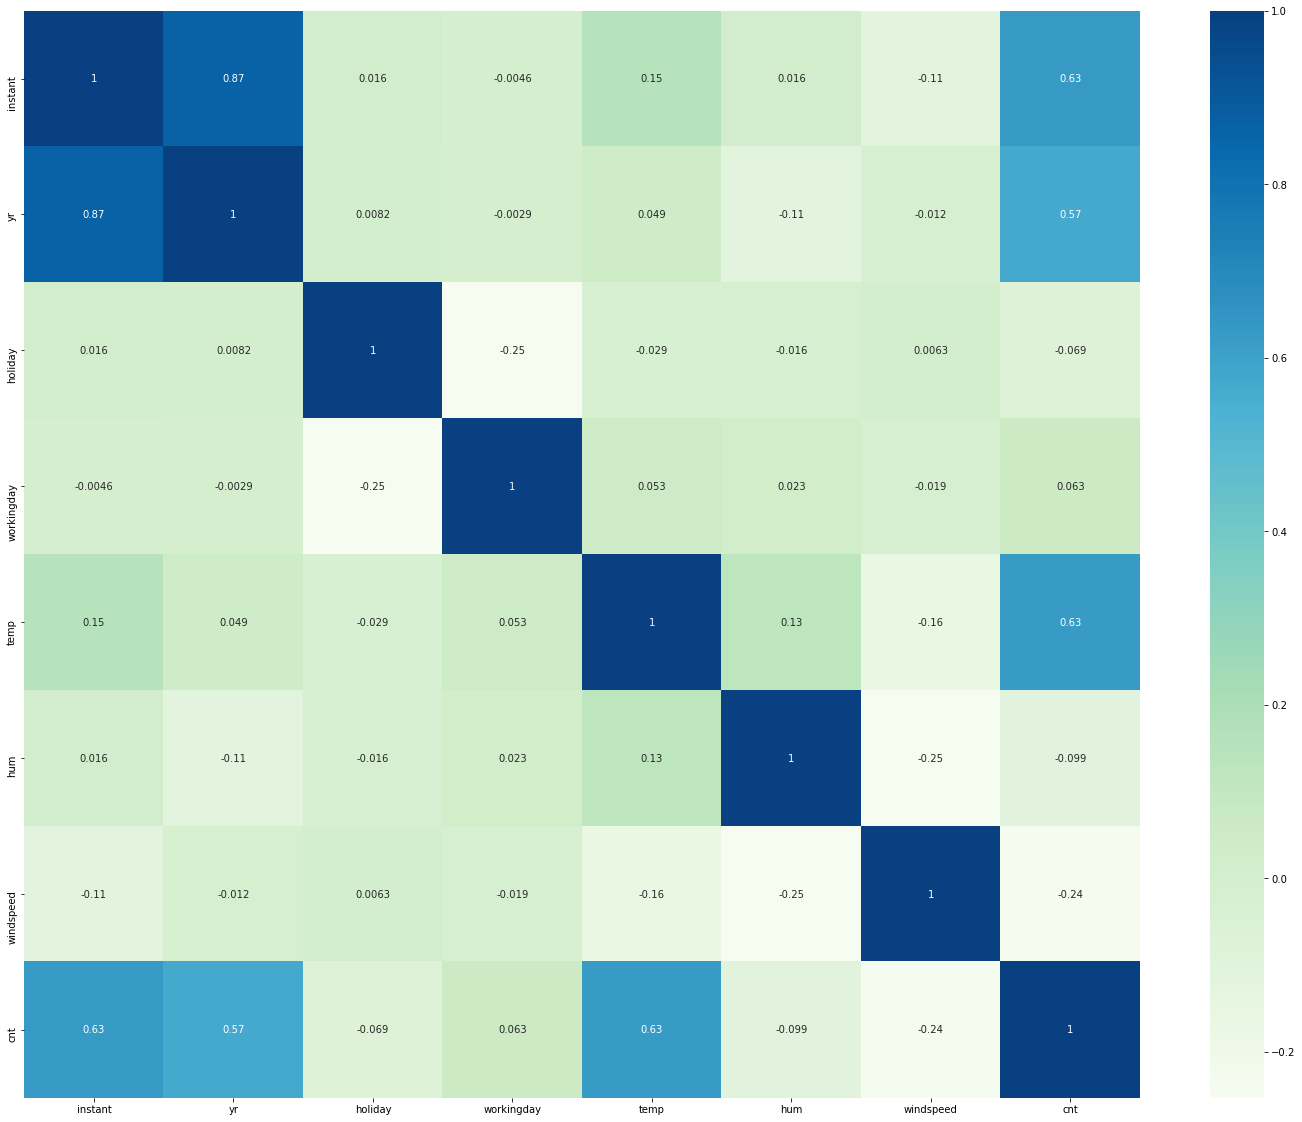

In [20]:
# Let's check the correlation coefficients to see which variables are highly correlated.

plt.figure(figsize = (25,20))
sns.heatmap(bike.corr(), annot = True, cmap="GnBu")
plt.show()

# Creating dummy variables

In [21]:
dummy = pd.get_dummies(bike[['season','mnth','weekday','weathersit']], drop_first=True)
dummy.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_LightRainSnow,weathersit_Misty
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [22]:
bike = pd.concat([bike,dummy], axis=1)   #Axis=1 is for horizontal stacking
bike = bike.drop(['season','mnth','weekday','weathersit'], axis=1)
bike.head()


,instant,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_LightRainSnow,weathersit_Misty
0,1,0,0,0,14.110847,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,2,0,0,0,14.902598,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,3,0,0,1,8.050924,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,4,0,0,1,8.200000,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,5,0,0,1,9.305237,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
bike.shape

(730, 30)

In [24]:
bike.head()

,instant,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_LightRainSnow,weathersit_Misty
0,1,0,0,0,14.110847,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,2,0,0,0,14.902598,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,3,0,0,1,8.050924,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,4,0,0,1,8.200000,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,5,0,0,1,9.305237,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


# Splitting the data into train and test

In [25]:
from sklearn.model_selection import train_test_split

# Specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.70, test_size = 0.30, random_state = 333)

In [26]:
df_train.shape

(510, 30)

In [27]:
df_test.shape

(219, 30)

In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   instant                   510 non-null    int64  
 1   yr                        510 non-null    int64  
 2   holiday                   510 non-null    int64  
 3   workingday                510 non-null    int64  
 4   temp                      510 non-null    float64
 5   hum                       510 non-null    float64
 6   windspeed                 510 non-null    float64
 7   cnt                       510 non-null    int64  
 8   season_Spring             510 non-null    uint8  
 9   season_Summer             510 non-null    uint8  
 10  season_Winter             510 non-null    uint8  
 11  mnth_Aug                  510 non-null    uint8  
 12  mnth_Dec                  510 non-null    uint8  
 13  mnth_Feb                  510 non-null    uint8  
 14  mnth_Jan

In [29]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   instant                   219 non-null    int64  
 1   yr                        219 non-null    int64  
 2   holiday                   219 non-null    int64  
 3   workingday                219 non-null    int64  
 4   temp                      219 non-null    float64
 5   hum                       219 non-null    float64
 6   windspeed                 219 non-null    float64
 7   cnt                       219 non-null    int64  
 8   season_Spring             219 non-null    uint8  
 9   season_Summer             219 non-null    uint8  
 10  season_Winter             219 non-null    uint8  
 11  mnth_Aug                  219 non-null    uint8  
 12  mnth_Dec                  219 non-null    uint8  
 13  mnth_Feb                  219 non-null    uint8  
 14  mnth_Jan 

# Rescale the features

In [30]:
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler


In [31]:
# We do a MinMax scaling
#Instantiating the object
scaler = MinMaxScaler()

In [32]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

cols = df_train.columns
df_train[cols] = scaler.fit_transform(df_train[cols])
#num_vars = ['temp', 'hum', 'windspeed']

#df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [33]:
df_train.head()

,instant,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_LightRainSnow,weathersit_Misty
483,0.662551,1.0,0.0,0.0,0.497426,0.609956,0.194850,0.722734,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
650,0.891632,1.0,0.0,0.0,0.416433,0.513852,0.255118,0.815347,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
212,0.290809,0.0,0.0,1.0,0.887856,0.572294,0.276919,0.488265,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
714,0.979424,1.0,0.0,0.0,0.378013,0.871429,0.161523,0.433042,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8,0.010974,0.0,0.0,0.0,0.098690,0.451083,0.700017,0.092039,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [34]:
df_train.describe()

,instant,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_LightRainSnow,weathersit_Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.500223,0.501961,0.023529,0.682353,0.540901,0.647390,0.346318,0.515144,0.24902,0.247059,...,0.084314,0.082353,0.139216,0.150980,0.143137,0.129412,0.141176,0.150980,0.025490,0.341176
std,0.294499,0.500487,0.151726,0.466018,0.227898,0.149722,0.160266,0.224281,0.43287,0.431725,...,0.278131,0.275172,0.346511,0.358381,0.350557,0.335985,0.348545,0.358381,0.157763,0.474570
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.243141,0.000000,0.000000,0.000000,0.343228,0.536147,0.230784,0.359468,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.501372,1.000000,0.000000,1.000000,0.540519,0.646367,0.325635,0.516337,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.762346,1.000000,0.000000,1.000000,0.740406,0.757900,0.434287,0.685861,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


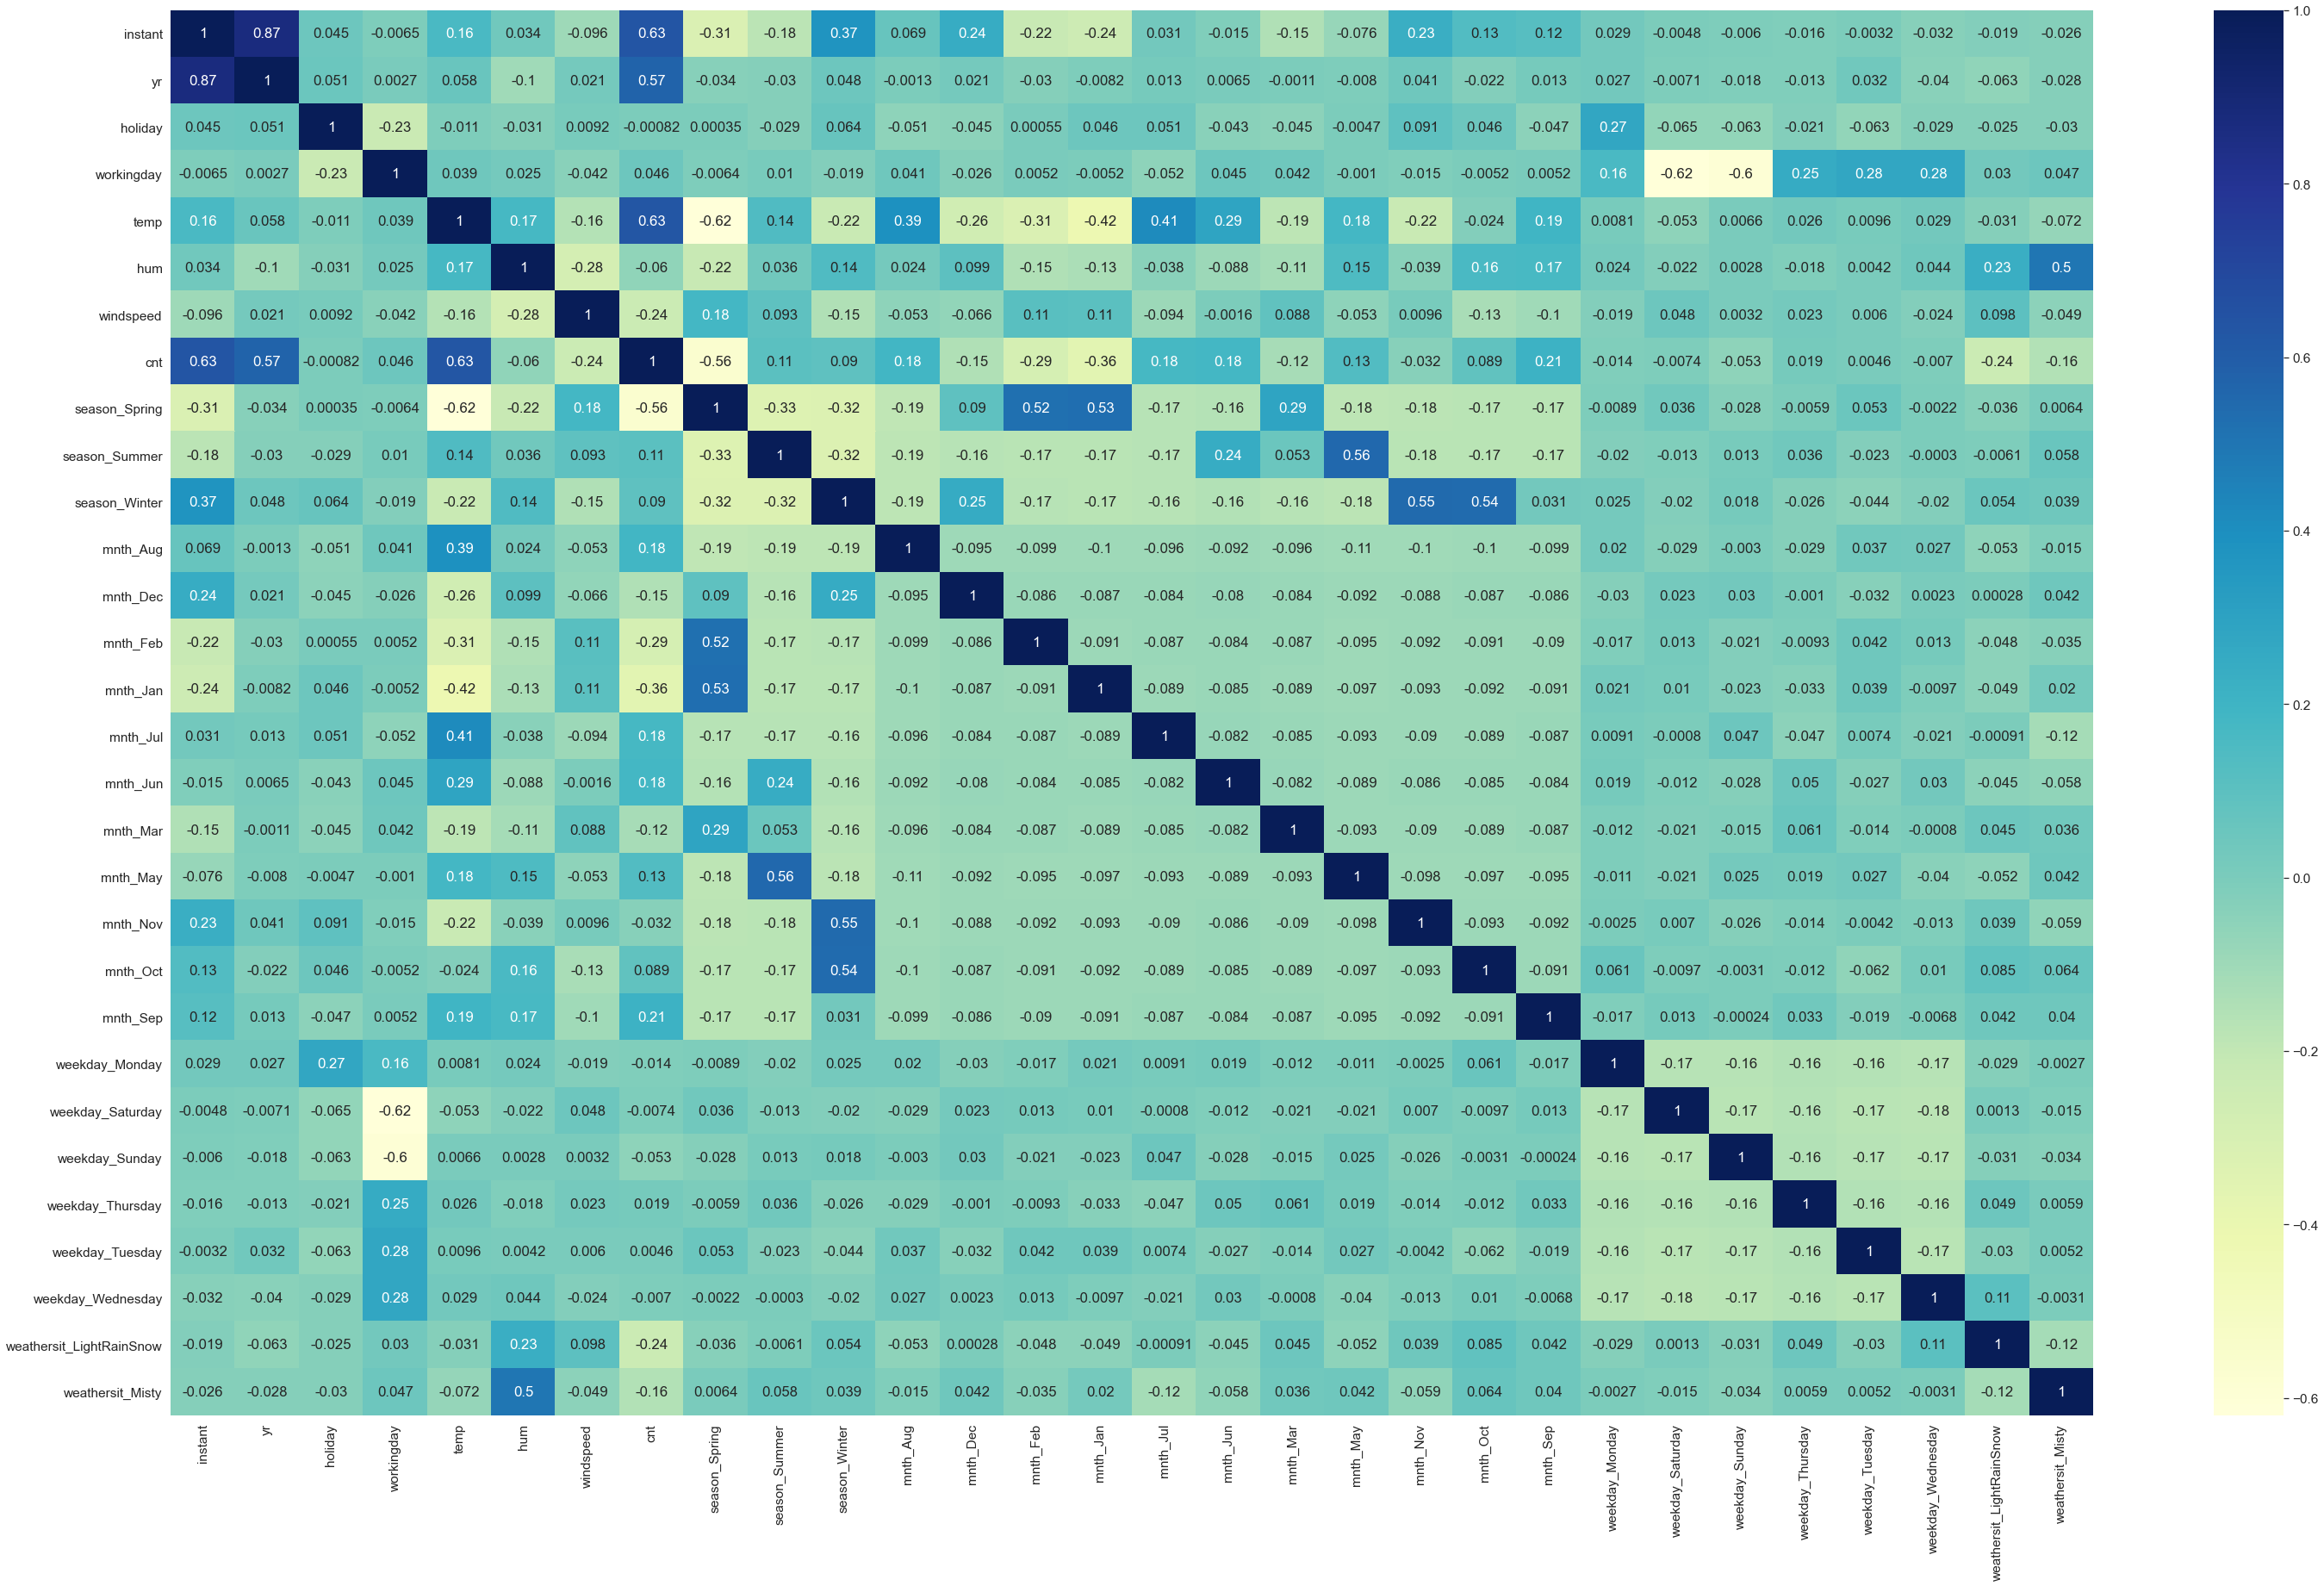

In [35]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (50, 30))
sns.set(font_scale=1.4)
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [36]:
#As we see cnt is highly co-related with year, temp, season3, working days and month 5 to month 9

# Dividing into X and Y sets for the model building

In [37]:
y_train = df_train.pop('cnt')
X_train = df_train

In [38]:
# Function for VIF Calculation

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

# Building the model

In [39]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm1)
lr1 = lr.fit()

In [40]:
# Check the parameters obtained

lr1.params

const                       0.331266
instant                    -0.462017
yr                          0.461609
holiday                     0.068776
workingday                  0.102078
temp                        0.453490
hum                        -0.166557
windspeed                  -0.182611
season_Spring              -0.089381
season_Summer               0.013401
season_Winter               0.089154
mnth_Aug                    0.066843
mnth_Dec                    0.106211
mnth_Feb                   -0.058282
mnth_Jan                   -0.093616
mnth_Jul                    0.020244
mnth_Jun                    0.042346
mnth_Mar                    0.011018
mnth_May                    0.045466
mnth_Nov                    0.078290
mnth_Oct                    0.126464
mnth_Sep                    0.166536
weekday_Monday             -0.032754
weekday_Saturday            0.107141
weekday_Sunday              0.053272
weekday_Thursday           -0.003999
weekday_Tuesday            -0.013677
w

In [41]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     95.03
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          2.34e-176
Time:                        10:43:16   Log-Likelihood:                 517.78
No. Observations:                 510   AIC:                            -977.6
Df Residuals:                     481   BIC:                            -854.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [42]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train)

,Features,VIF
0,instant,595.57
1,yr,433.57
3,workingday,171.71
11,mnth_Dec,61.26
18,mnth_Nov,55.30
19,mnth_Oct,41.81
22,weekday_Saturday,38.00
23,weekday_Sunday,36.29
20,mnth_Sep,28.64
10,mnth_Aug,23.96


In [43]:
#X_train_new = X_train_rfe.drop(['workingday'], axis = 1)
X_train_new = X_train.drop(['instant'], axis = 1)

In [44]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [45]:
# Check the parameters obtained

lr1.params

const                       0.283272
yr                          0.229931
holiday                     0.058742
workingday                  0.089543
temp                        0.451782
hum                        -0.170886
windspeed                  -0.184784
season_Spring              -0.090103
season_Summer               0.012170
season_Winter               0.089611
mnth_Aug                   -0.011463
mnth_Dec                   -0.050563
mnth_Feb                   -0.021616
mnth_Jan                   -0.037864
mnth_Jul                   -0.038605
mnth_Jun                    0.003127
mnth_Mar                    0.029640
mnth_May                    0.026353
mnth_Nov                   -0.059757
mnth_Oct                    0.007420
mnth_Sep                    0.068009
weekday_Monday             -0.033378
weekday_Saturday            0.094402
weekday_Sunday              0.040585
weekday_Thursday           -0.004200
weekday_Tuesday            -0.013868
weekday_Wednesday          -0.000300
w

In [46]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     98.29
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          6.10e-177
Time:                        10:43:17   Log-Likelihood:                 516.75
No. Observations:                 510   AIC:                            -977.5
Df Residuals:                     482   BIC:                            -858.9
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [47]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,workingday,91.13
21,weekday_Saturday,20.05
22,weekday_Sunday,19.30
6,season_Spring,11.06
7,season_Summer,8.39
8,season_Winter,8.29
17,mnth_Nov,6.88
3,temp,6.87
18,mnth_Oct,6.54
9,mnth_Aug,6.48


In [48]:
X_train_new1 = X_train_new.drop(['weekday_Wednesday'], axis = 1)


In [49]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new1)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [50]:
# Check the parameters obtained

lr2.params

const                       0.283235
yr                          0.229936
holiday                     0.058654
workingday                  0.089459
temp                        0.451740
hum                        -0.170919
windspeed                  -0.184784
season_Spring              -0.090109
season_Summer               0.012175
season_Winter               0.089629
mnth_Aug                   -0.011452
mnth_Dec                   -0.050569
mnth_Feb                   -0.021621
mnth_Jan                   -0.037865
mnth_Jul                   -0.038577
mnth_Jun                    0.003129
mnth_Mar                    0.029645
mnth_May                    0.026370
mnth_Nov                   -0.059760
mnth_Oct                    0.007415
mnth_Sep                    0.068023
weekday_Monday             -0.033226
weekday_Saturday            0.094470
weekday_Sunday              0.040652
weekday_Thursday           -0.004046
weekday_Tuesday            -0.013716
weathersit_LightRainSnow   -0.270919
w

In [51]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     102.3
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          5.97e-178
Time:                        10:43:17   Log-Likelihood:                 516.75
No. Observations:                 510   AIC:                            -979.5
Df Residuals:                     483   BIC:                            -865.2
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [52]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new1)

,Features,VIF
2,workingday,89.57
21,weekday_Saturday,20.03
22,weekday_Sunday,19.28
6,season_Spring,11.06
7,season_Summer,8.39
8,season_Winter,8.28
17,mnth_Nov,6.88
3,temp,6.85
18,mnth_Oct,6.54
9,mnth_Aug,6.48


In [53]:
X_train_new2 = X_train_new1.drop(['weekday_Thursday'], axis = 1)

In [54]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new2)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [55]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     106.6
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          5.99e-179
Time:                        10:43:17   Log-Likelihood:                 516.70
No. Observations:                 510   AIC:                            -981.4
Df Residuals:                     484   BIC:                            -871.3
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [56]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new2)

,Features,VIF
2,workingday,88.93
21,weekday_Saturday,20.03
22,weekday_Sunday,19.28
6,season_Spring,11.06
7,season_Summer,8.39
8,season_Winter,8.27
17,mnth_Nov,6.87
3,temp,6.85
18,mnth_Oct,6.54
9,mnth_Aug,6.47


In [57]:
X_train_new3 = X_train_new2.drop(['weekday_Tuesday'], axis = 1)

In [58]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new3)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [59]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     111.0
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          9.28e-180
Time:                        10:43:18   Log-Likelihood:                 516.17
No. Observations:                 510   AIC:                            -982.3
Df Residuals:                     485   BIC:                            -876.5
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [60]:
lr4.params

const                       0.281979
yr                          0.229627
holiday                     0.056820
workingday                  0.086711
temp                        0.452152
hum                        -0.172847
windspeed                  -0.185661
season_Spring              -0.091530
season_Summer               0.013157
season_Winter               0.088380
mnth_Aug                   -0.010903
mnth_Dec                   -0.047737
mnth_Feb                   -0.019711
mnth_Jan                   -0.035943
mnth_Jul                   -0.037978
mnth_Jun                    0.003716
mnth_Mar                    0.031387
mnth_May                    0.025961
mnth_Nov                   -0.057295
mnth_Oct                    0.010390
mnth_Sep                    0.069531
weekday_Monday             -0.028952
weekday_Saturday            0.096109
weekday_Sunday              0.042339
weathersit_LightRainSnow   -0.269668
weathersit_Misty           -0.049377
dtype: float64

In [61]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new3)

,Features,VIF
2,workingday,88.59
21,weekday_Saturday,20.03
22,weekday_Sunday,19.28
6,season_Spring,11.03
7,season_Summer,8.38
8,season_Winter,8.25
3,temp,6.84
17,mnth_Nov,6.84
18,mnth_Oct,6.50
9,mnth_Aug,6.47


In [62]:
#High VIF - High P-value
X_train_new4 = X_train_new3.drop(['workingday'], axis = 1)

In [63]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new4)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [64]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     111.0
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          9.28e-180
Time:                        10:43:18   Log-Likelihood:                 516.17
No. Observations:                 510   AIC:                            -982.3
Df Residuals:                     485   BIC:                            -876.5
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [65]:
lr5.params

const                       0.368690
yr                          0.229627
holiday                    -0.029891
temp                        0.452152
hum                        -0.172847
windspeed                  -0.185661
season_Spring              -0.091530
season_Summer               0.013157
season_Winter               0.088380
mnth_Aug                   -0.010903
mnth_Dec                   -0.047737
mnth_Feb                   -0.019711
mnth_Jan                   -0.035943
mnth_Jul                   -0.037978
mnth_Jun                    0.003716
mnth_Mar                    0.031387
mnth_May                    0.025961
mnth_Nov                   -0.057295
mnth_Oct                    0.010390
mnth_Sep                    0.069531
weekday_Monday             -0.028952
weekday_Saturday            0.009399
weekday_Sunday             -0.044371
weathersit_LightRainSnow   -0.269668
weathersit_Misty           -0.049377
dtype: float64

In [66]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new4)

,Features,VIF
2,temp,35.94
3,hum,34.74
5,season_Spring,12.40
7,season_Winter,10.23
6,season_Summer,6.55
4,windspeed,6.14
17,mnth_Oct,5.96
8,mnth_Aug,5.76
16,mnth_Nov,5.73
11,mnth_Jan,5.25


In [67]:
X_train_new5 = X_train_new4.drop(['season_Winter'], axis = 1)

In [68]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new5)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [69]:
# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     113.0
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          1.78e-178
Time:                        10:43:18   Log-Likelihood:                 510.52
No. Observations:                 510   AIC:                            -973.0
Df Residuals:                     486   BIC:                            -871.4
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [70]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new5)

,Features,VIF
2,temp,35.82
3,hum,34.38
5,season_Spring,8.54
4,windspeed,6.13
6,season_Summer,6.12
7,mnth_Aug,5.60
11,mnth_Jul,5.07
10,mnth_Jan,4.46
9,mnth_Feb,4.25
17,mnth_Sep,4.17


In [71]:
X_train_new6 = X_train_new5.drop(['mnth_Nov'], axis = 1)

In [72]:
# Add a constant
X_train_lm7 = sm.add_constant(X_train_new6)

# Create a first fitted model
lr7 = sm.OLS(y_train, X_train_lm7).fit()

In [73]:
# Print a summary of the linear regression model obtained
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     118.4
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          1.61e-179
Time:                        10:43:18   Log-Likelihood:                 510.52
No. Observations:                 510   AIC:                            -975.0
Df Residuals:                     487   BIC:                            -877.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [74]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new6)

,Features,VIF
2,temp,35.74
3,hum,23.20
5,season_Spring,8.00
4,windspeed,5.56
10,mnth_Jan,4.01
7,mnth_Aug,3.80
9,mnth_Feb,3.80
6,season_Summer,3.69
11,mnth_Jul,3.68
16,mnth_Sep,2.56


In [75]:
lr7.params

const                       0.404198
yr                          0.230655
holiday                    -0.030033
temp                        0.443508
hum                        -0.173678
windspeed                  -0.189282
season_Spring              -0.151209
season_Summer              -0.016900
mnth_Aug                   -0.038818
mnth_Dec                   -0.002423
mnth_Feb                    0.008120
mnth_Jan                   -0.008929
mnth_Jul                   -0.065377
mnth_Jun                   -0.005612
mnth_Mar                    0.050383
mnth_May                    0.026830
mnth_Oct                    0.068549
mnth_Sep                    0.065971
weekday_Monday             -0.028353
weekday_Saturday            0.008160
weekday_Sunday             -0.041906
weathersit_LightRainSnow   -0.274798
weathersit_Misty           -0.048401
dtype: float64

In [76]:
X_train_new7 = X_train_new6.drop(['mnth_Dec'], axis = 1)

In [77]:
# Add a constant
X_train_lm8 = sm.add_constant(X_train_new7)

# Create a first fitted model
lr8 = sm.OLS(y_train, X_train_lm8).fit()

In [78]:
# Print a summary of the linear regression model obtained
print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     124.3
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          1.44e-180
Time:                        10:43:19   Log-Likelihood:                 510.51
No. Observations:                 510   AIC:                            -977.0
Df Residuals:                     488   BIC:                            -883.9
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [79]:
calculateVIF(X_train_new7)

,Features,VIF
2,temp,35.31
3,hum,19.81
5,season_Spring,7.07
4,windspeed,5.55
7,mnth_Aug,3.70
10,mnth_Jul,3.62
6,season_Summer,3.59
9,mnth_Jan,3.05
8,mnth_Feb,2.90
15,mnth_Sep,2.42


In [80]:
X_train_new8 = X_train_new7.drop(['mnth_Jan'], axis = 1)

In [81]:
# Add a constant
X_train_lm9 = sm.add_constant(X_train_new8)

# Create a first fitted model
lr9 = sm.OLS(y_train, X_train_lm9).fit()

In [82]:
# Print a summary of the linear regression model obtained
print(lr9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     130.7
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          1.30e-181
Time:                        10:43:19   Log-Likelihood:                 510.47
No. Observations:                 510   AIC:                            -978.9
Df Residuals:                     489   BIC:                            -890.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [83]:
calculateVIF(X_train_new8)

,Features,VIF
2,temp,34.06
3,hum,19.60
4,windspeed,5.48
7,mnth_Aug,3.62
9,mnth_Jul,3.54
5,season_Spring,3.47
6,season_Summer,3.46
10,mnth_Jun,2.41
14,mnth_Sep,2.39
12,mnth_May,2.30


In [84]:
X_train_new9 = X_train_new8.drop(['mnth_Jun'], axis = 1)

In [85]:
# Add a constant
X_train_lm10 = sm.add_constant(X_train_new9)

# Create a first fitted model
lr10 = sm.OLS(y_train, X_train_lm10).fit()

In [86]:
# Print a summary of the linear regression model obtained
print(lr10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     137.9
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          1.13e-182
Time:                        10:43:19   Log-Likelihood:                 510.43
No. Observations:                 510   AIC:                            -980.9
Df Residuals:                     490   BIC:                            -896.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [87]:
X_train_new10 = X_train_new9.drop(['weekday_Saturday'], axis = 1)

In [88]:
# Add a constant
X_train_lm11 = sm.add_constant(X_train_new10)

# Create a first fitted model
lr11 = sm.OLS(y_train, X_train_lm11).fit()

In [89]:
# Print a summary of the linear regression model obtained
print(lr11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     145.7
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          1.18e-183
Time:                        10:43:19   Log-Likelihood:                 510.17
No. Observations:                 510   AIC:                            -982.3
Df Residuals:                     491   BIC:                            -901.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [90]:
calculateVIF(X_train_new10)

,Features,VIF
2,temp,18.89
3,hum,16.89
4,windspeed,5.23
6,season_Summer,3.46
5,season_Spring,3.45
7,mnth_Aug,2.42
9,mnth_Jul,2.35
17,weathersit_Misty,2.16
0,yr,2.00
13,mnth_Sep,1.84


In [91]:
X_train_new11 = X_train_new10.drop(['mnth_Feb'], axis =1)

In [92]:
# Add a constant
X_train_lm12 = sm.add_constant(X_train_new11)

# Create a first fitted model
lr12 = sm.OLS(y_train, X_train_lm12).fit()

In [93]:
# Print a summary of the linear regression model obtained
print(lr12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     154.3
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          1.30e-184
Time:                        10:43:19   Log-Likelihood:                 509.83
No. Observations:                 510   AIC:                            -983.7
Df Residuals:                     492   BIC:                            -907.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [94]:
calculateVIF(X_train_new11)

,Features,VIF
2,temp,18.86
3,hum,16.88
4,windspeed,5.23
6,season_Summer,3.45
5,season_Spring,2.66
7,mnth_Aug,2.42
8,mnth_Jul,2.35
16,weathersit_Misty,2.16
0,yr,2.00
12,mnth_Sep,1.84


In [95]:
X_train_new12 = X_train_new11.drop(['holiday'], axis =1)

In [96]:
# Add a constant
X_train_lm13 = sm.add_constant(X_train_new12)

# Create a first fitted model
lr13 = sm.OLS(y_train, X_train_lm13).fit()

In [97]:
# Print a summary of the linear regression model obtained
print(lr13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     163.8
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          1.80e-185
Time:                        10:43:20   Log-Likelihood:                 509.21
No. Observations:                 510   AIC:                            -984.4
Df Residuals:                     493   BIC:                            -912.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [98]:
calculateVIF(X_train_new12)

,Features,VIF
1,temp,18.86
2,hum,16.88
3,windspeed,5.23
5,season_Summer,3.45
4,season_Spring,2.66
6,mnth_Aug,2.42
7,mnth_Jul,2.35
15,weathersit_Misty,2.16
0,yr,2.00
11,mnth_Sep,1.83


In [99]:
X_train_new13 = X_train_new12.drop(['season_Summer'], axis =1)

In [100]:
# Add a constant
X_train_lm14 = sm.add_constant(X_train_new13)

# Create a first fitted model
lr14 = sm.OLS(y_train, X_train_lm14).fit()

In [101]:
# Print a summary of the linear regression model obtained
print(lr14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     174.6
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          2.33e-186
Time:                        10:43:20   Log-Likelihood:                 508.64
No. Observations:                 510   AIC:                            -985.3
Df Residuals:                     494   BIC:                            -917.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [102]:
calculateVIF(X_train_new13)

,Features,VIF
1,temp,17.09
2,hum,16.86
3,windspeed,5.02
4,season_Spring,2.15
14,weathersit_Misty,2.15
0,yr,1.99
6,mnth_Jul,1.88
5,mnth_Aug,1.86
8,mnth_May,1.48
10,mnth_Sep,1.47


In [103]:
X_train_new14 = X_train_new13.drop(['hum'], axis =1)

In [104]:
# Add a constant
X_train_lm15 = sm.add_constant(X_train_new14)

# Create a first fitted model
lr15 = sm.OLS(y_train, X_train_lm15).fit()

In [105]:
# Print a summary of the linear regression model obtained
print(lr15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     178.7
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          3.20e-183
Time:                        10:43:20   Log-Likelihood:                 498.43
No. Observations:                 510   AIC:                            -966.9
Df Residuals:                     495   BIC:                            -903.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [106]:
# cnt = 0.2973 + 0.2347*yr + 0.4138*temp - 0.1540 * windspeed - 0.1426*season_Spring  -0.0232*mnth_Aug -0.0469*mnth_Jul + 0.0564 * mnth_Mar + 0.0128 * mnth_May +  0.0719 * mnth_Oct + 0.0714*mnth_Sep -0.0367* weekday_Monday
#      -0.0461*weekday_Sunday -0.3266*weathersit_LightRainSnow -0.0778*weathersit_Misty

In [107]:
calculateVIF(X_train_new14)

,Features,VIF
1,temp,8.75
2,windspeed,4.90
0,yr,1.98
4,mnth_Aug,1.80
5,mnth_Jul,1.79
3,season_Spring,1.76
13,weathersit_Misty,1.51
7,mnth_May,1.48
9,mnth_Sep,1.47
8,mnth_Oct,1.29


# Validating the assumptions of Linear Regression
Linear Relationship
Homoscedasticity
Absence of Multicollinearity
Independence of residuals (absence of auto-correlation)
Normality of Errors

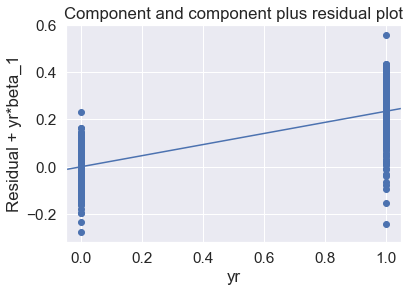

In [108]:
# Validating Linear Relationship
sm.graphics.plot_ccpr(lr15, 'yr')
plt.show()

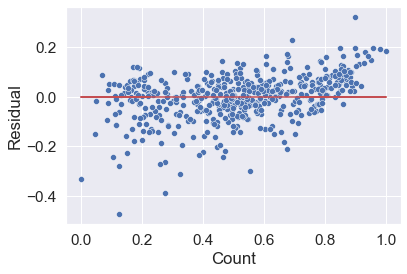

In [109]:

# Validating Homoscedasticity using scatterplot: The residuals have constant variance with respect to the dependent variable
y_train_pred = lr15.predict(X_train_lm15)
sns.scatterplot(y_train,(y_train - y_train_pred))
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

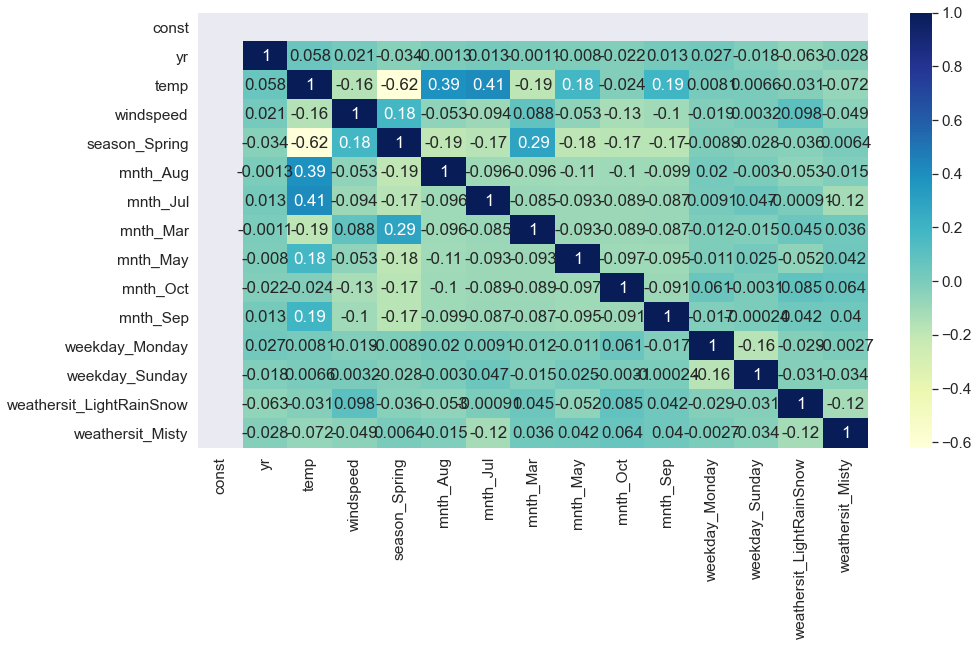

In [110]:
# Validating Multi Colinearity
plt.figure(figsize=(15,8))
sns.heatmap(X_train_lm15.corr(),annot=True, cmap='YlGnBu')
plt.show()

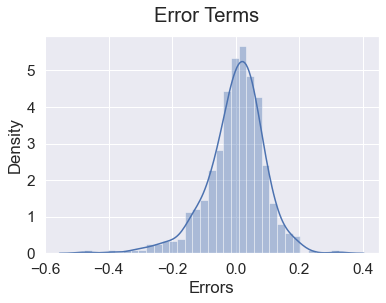

In [111]:
# Normality of Errors
y_train_pred = lr15.predict(X_train_lm15)

# Ploting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred))
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')     
plt.show()

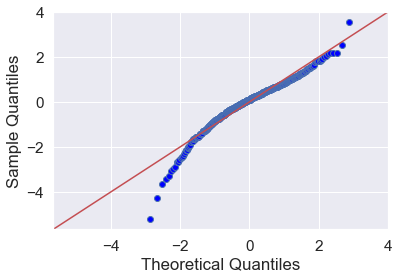

In [112]:
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

# Making Predictions Using the Final Model

In [113]:
# Scaling the Test Dataset with the Scaler of the Training Set
df_test.shape
cols = df_test.columns
df_test[cols] = scaler.transform(df_test[cols])

In [114]:
# Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [115]:
# Adding the constant column
X_test_rem = sm.add_constant(X_test)
# Removing all the columns which has been removed from Model 14
X_test_rem = X_test_rem.drop(['hum','mnth_Jun','mnth_Nov','holiday','workingday',
                              'season_Winter','season_Summer','mnth_Dec','mnth_Jan','mnth_Feb',
                              'weekday_Tuesday','weekday_Wednesday','weekday_Thursday','weekday_Saturday','instant' ], axis=1)

In [116]:
X_test_rem.shape

(219, 15)

In [117]:
X_test_rem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   const                     219 non-null    float64
 1   yr                        219 non-null    float64
 2   temp                      219 non-null    float64
 3   windspeed                 219 non-null    float64
 4   season_Spring             219 non-null    float64
 5   mnth_Aug                  219 non-null    float64
 6   mnth_Jul                  219 non-null    float64
 7   mnth_Mar                  219 non-null    float64
 8   mnth_May                  219 non-null    float64
 9   mnth_Oct                  219 non-null    float64
 10  mnth_Sep                  219 non-null    float64
 11  weekday_Monday            219 non-null    float64
 12  weekday_Sunday            219 non-null    float64
 13  weathersit_LightRainSnow  219 non-null    float64
 14  weathersi

In [118]:

#print(X_test_rem.cols)
# Making prediction using last Model
y_test_pred = lr15.predict(X_test_rem)


# Model Evaluation

Text(0, 0.5, 'y_pred')

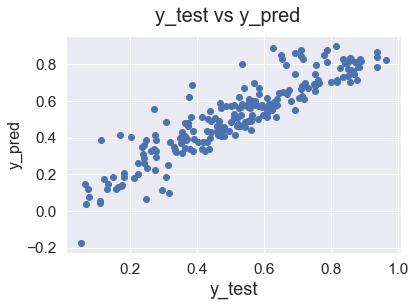

In [119]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [120]:
#Equation for best fitted line

cnt = 0.2973 + 0.2347*yr + 0.4138*temp - 0.1540 * windspeed - 0.1426*season_Spring  -0.0232*mnth_Aug -0.0469*mnth_Jul + 0.0564 * mnth_Mar + 0.0128 * mnth_May +  0.0719 * mnth_Oct + 0.0714*mnth_Sep -0.0367* weekday_Monday
      -0.0461*weekday_Sunday -0.3266*weathersit_LightRainSnow -0.0778*weathersit_Misty

# r2 score calculation

In [124]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [125]:
print('The R-Squared score of the model for the predicted values is',round(r2_score(y_test, y_test_pred),2))
print('The Root Mean Squared Error of the model for the predicted values is',round(np.sqrt(mean_squared_error(y_test, y_test_pred)),4))
print('The Mean Absolute Error of the model for the predicted values is',mean_absolute_error(y_test, y_test_pred))

The R-Squared score of the model for the predicted values is 0.83
The Root Mean Squared Error of the model for the predicted values is 0.0915
The Mean Absolute Error of the model for the predicted values is 0.07049402697941551


In [126]:

r2_score(y_test, y_test_pred)

0.826055055630216


 Factors on which the demand for US bike-sharing provider BoomBikes depends are
 1. Bike-share demand spikes in month of  May, June, July, Aug, Sep
 2. Bike-share demand is high in Summer and Fall season 
 3. Bike-share demand is high during clear and misty days.
 4. Rain and snow decrease demand. 
 5. Every year bike-share is becoming popular
 6. As temprature rise, bike-share spikes